# Credal Networks

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

In [49]:
import os

%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt


In [50]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
gnb.configuration()

Library,Version
OS,nt [win32]
Python,"3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:13:41) [MSC v.1929 64 bit (AMD64)]"
IPython,8.5.0
Matplotlib,3.7.1
Numpy,1.24.3
pyDot,1.4.2
pyAgrum,1.8.0


## Credal Net from BN

In [51]:
bn=gum.fastBN("A->B[3]->C<-D<-A->E->F")
bn_min=gum.BayesNet(bn)
bn_max=gum.BayesNet(bn)
for n in bn.nodes():
  x=0.4*min(bn.cpt(n).min(),1-bn.cpt(n).max())
  bn_min.cpt(n).translate(-x)
  bn_max.cpt(n).translate(x)
    
cn=gum.CredalNet(bn_min,bn_max)
cn.intervalToCredal()

gnb.flow.row(bn,bn.cpt("B"),cn,bn_min.cpt("B"),bn_max.cpt("B"),captions=["Bayes Net","CPT","Credal Net","CPTmin","CPTmax"])


#### We can use LBP on CN (L2U) only for binary credal networks (here B is not binary). We then propose the classical binarization (but warn the user that this leads to approximation in the inference)

In [52]:
cn2=gum.CredalNet(bn_min,bn_max)
cn2.intervalToCredal()
cn2.approximatedBinarization()
cn2.computeBinaryCPTMinMax()

gnb.flow.row(cn,cn2,captions=["Credal net","Binarized credal net"])

Here, $B$ becomes 
- $B$-b$i$ : the $i$-th bit of B
- instrumental $B$-v$k$ : the indicator variable for each modality $k$ of $B$

In [53]:
ie_mc=gum.CNMonteCarloSampling(cn)
ie2_lbp=gum.CNLoopyPropagation(cn2)
ie2_mc=gum.CNMonteCarloSampling(cn2)

In [54]:
gnb.sideBySide(gnb.getInference(cn,engine=ie_mc),
               gnb.getInference(cn2,engine=ie2_mc),
               gnb.getInference(cn2,engine=ie2_lbp))

In [55]:
gnb.sideBySide(ie_mc.CN(),ie_mc.marginalMin("F"),ie_mc.marginalMax("F"),
               ie_mc.CN(),ie2_lbp.marginalMin("F"),ie2_lbp.marginalMax("F"),
              ncols=3)
print(cn)


A:Range([0,1])
<> : [[0.564812 , 0.435188] , [0.813492 , 0.186508]]

B:Range([0,2])
<A:0> : [[0.431686 , 0.411511 , 0.156803] , [0.431686 , 0.456311 , 0.112003] , [0.476488 , 0.456311 , 0.0672016] , [0.521289 , 0.41151 , 0.0672016] , [0.476489 , 0.366708 , 0.156803] , [0.521289 , 0.366708 , 0.112003]]
<A:1> : [[0.232135 , 0.490403 , 0.277461] , [0.232135 , 0.535204 , 0.232661] , [0.276939 , 0.535204 , 0.187858] , [0.321739 , 0.490403 , 0.187858] , [0.276937 , 0.445602 , 0.277461] , [0.321739 , 0.445602 , 0.232659]]

C:Range([0,1])
<B:0|D:0> : [[0.277796 , 0.722204] , [0.378315 , 0.621685]]
<B:1|D:0> : [[0.0753899 , 0.92461] , [0.175908 , 0.824092]]
<B:2|D:0> : [[0.315568 , 0.684432] , [0.416087 , 0.583913]]
<B:0|D:1> : [[0.520799 , 0.479201] , [0.621317 , 0.378683]]
<B:1|D:1> : [[0.325859 , 0.674141] , [0.426378 , 0.573622]]
<B:2|D:1> : [[0.238643 , 0.761357] , [0.339161 , 0.660839]]

D:Range([0,1])
<A:0> : [[0.284564 , 0.715436] , [0.652493 , 0.347507]]
<A:1> : [[0.356128 , 0.643872]

## Credal Net from bif files

In [56]:
cn=gum.CredalNet("res/cn/2Umin.bif","res/cn/2Umax.bif")
cn.intervalToCredal()

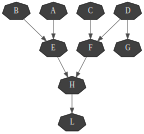

In [57]:
gnb.showCN(cn,"2")

In [58]:
ie=gum.CNMonteCarloSampling(cn)
ie.insertEvidenceFile("res/cn/L2U.evi")

In [59]:
ie.setRepetitiveInd(False)
ie.setMaxTime(1)
ie.setMaxIter(1000)

ie.makeInference()

In [60]:
cn

(pyAgrum.CredalNet<double>@0000024331605050) 
A:Labelized({0|1})
<> : [[0.6 , 0.4] , [0.7 , 0.3]]

B:Labelized({0|1})
<> : [[0.6 , 0.4] , [0.8 , 0.2]]

C:Labelized({0|1})
<> : [[0 , 1] , [0.1 , 0.9]]

D:Labelized({0|1})
<> : [[0.1 , 0.9] , [0.5 , 0.5]]

E:Labelized({0|1})
<A:0|B:0> : [[0.3 , 0.7] , [0.4 , 0.6]]
<A:1|B:0> : [[0.8 , 0.2] , [1 , 0]]
<A:0|B:1> : [[0.7 , 0.3] , [0.9 , 0.1]]
<A:1|B:1> : [[0.5 , 0.5] , [0.7 , 0.3]]

F:Labelized({0|1})
<C:0|D:0> : [[0.1 , 0.9] , [0.2 , 0.8]]
<C:1|D:0> : [[0.5 , 0.5]]
<C:0|D:1> : [[0.3 , 0.7] , [0.5 , 0.5]]
<C:1|D:1> : [[0.6 , 0.4] , [0.9 , 0.1]]

G:Labelized({0|1})
<D:0> : [[0.6 , 0.4] , [0.8 , 0.2]]
<D:1> : [[0.2 , 0.8] , [0.3 , 0.7]]

H:Labelized({0|1})
<E:0|F:0> : [[0 , 1] , [0.1 , 0.9]]
<E:1|F:0> : [[0.6 , 0.4] , [0.8 , 0.2]]
<E:0|F:1> : [[0.2 , 0.8] , [0.4 , 0.6]]
<E:1|F:1> : [[0.8 , 0.2] , [0.9 , 0.1]]

L:Labelized({0|1})
<H:0> : [[0.8 , 0.2] , [1 , 0]]
<H:1> : [[0.5 , 0.5] , [0.6 , 0.4]]

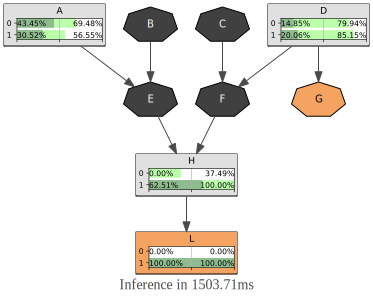

In [61]:
gnb.showInference(cn,targets={"A","H","L","D"},engine=ie,evs={"L":[0,1],"G":[1,0]})

## Comparing inference in credal networks

In [62]:
import pyAgrum as gum

def showDiffInference(model,mc,lbp):
    for i in model.current_bn().nodes():
        a,b=mc.marginalMin(i)[:]
        c,d=mc.marginalMax(i)[:]
        
        e,f=lbp.marginalMin(i)[:]
        g,h=lbp.marginalMax(i)[:]
        
        plt.scatter([a,b,c,d],[e,f,g,h])
        

cn=gum.CredalNet("res/cn/2Umin.bif","res/cn/2Umax.bif")
cn.intervalToCredal()

#### The two inference give quite the same result

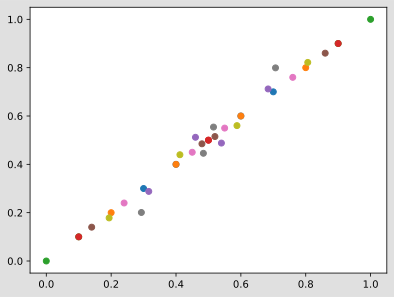

In [63]:
ie_mc=gum.CNMonteCarloSampling(cn)
ie_mc.makeInference()

cn.computeBinaryCPTMinMax()
ie_lbp=gum.CNLoopyPropagation(cn)
ie_lbp.makeInference()

showDiffInference(cn,ie_mc,ie_lbp)

#### but not when evidence are inserted

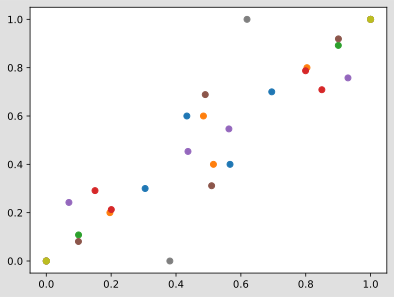

In [64]:
ie_mc=gum.CNMonteCarloSampling(cn)
ie_mc.insertEvidenceFile("res/cn/L2U.evi")
ie_mc.makeInference()

ie_lbp=gum.CNLoopyPropagation(cn)
ie_lbp.insertEvidenceFile("res/cn/L2U.evi")
ie_lbp.makeInference()

showDiffInference(cn,ie_mc,ie_lbp)


## Dynamical Credal Net

In [65]:
cn=gum.CredalNet("res/cn/bn_c_8.bif","res/cn/den_c_8.bif")
cn.bnToCredal(0.8,False)

In [66]:
ie=gum.CNMonteCarloSampling(cn)
ie.insertModalsFile("res/cn/modalities.modal")

ie.setRepetitiveInd(True)
ie.setMaxTime(5)
ie.setMaxIter(1000)

ie.makeInference()

In [67]:
print(ie.dynamicExpMax("temp"))

(14.203404648134416, 11.911090684366485, 12.190483075680442, 12.031555584857191, 12.004198572496797, 12.008870898650432, 12.007860641421736, 12.007688078235907, 12.007727248106775)


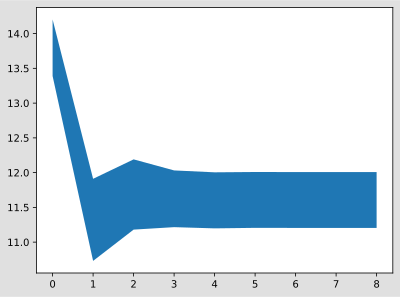

In [68]:
fig=figure()
ax=fig.add_subplot(111)
ax.fill_between(range(9),ie.dynamicExpMax("temp"),ie.dynamicExpMin("temp"))
plt.show()

In [69]:
ie=gum.CNMonteCarloSampling(cn)
ie.insertModalsFile("res/cn/modalities.modal")

ie.setRepetitiveInd(False)
ie.setMaxTime(5)
ie.setMaxIter(1000)

ie.makeInference()
print(ie.messageApproximationScheme())

stopped with epsilon=0


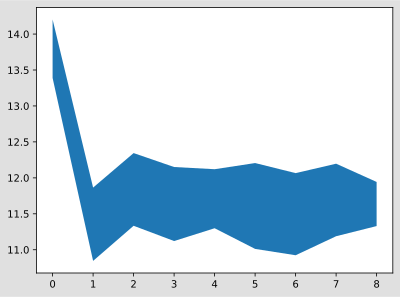

In [70]:
fig=figure()
ax=fig.add_subplot(111)
ax.fill_between(range(9),ie.dynamicExpMax("temp"),ie.dynamicExpMin("temp"))
plt.show()

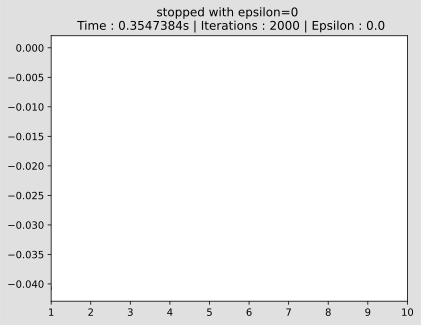

In [71]:
ie=gum.CNMonteCarloSampling(cn)
ie.insertModalsFile("res/cn/modalities.modal")

ie.setRepetitiveInd(False)
ie.setMaxTime(5)
ie.setMaxIter(5000)

gnb.animApproximationScheme(ie)
ie.makeInference()

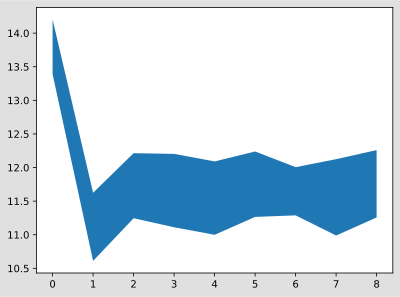

In [72]:
fig=figure()
ax=fig.add_subplot(111)
ax.fill_between(range(9),ie.dynamicExpMax("temp"),ie.dynamicExpMin("temp"));
plt.show()